MiniChallenge_TaxiType_Jan2024_6609520116.ipynb

---



กมลพันธ์ กันธายอด 6609520116

ประเภท Taxi ไหนมีจำนวน rides มากที่สุดในเดือน Jan 2024 และมีจำนวนเท่าไร?

แหล่งอ้างอิง : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Setup

In [46]:
import pandas as pd
import os
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.parquet as pq

# Ingestion

In [47]:
### Storage & Ingestion ###
# Folder where files are stored
data_folder = "cs341-m2-data"

# Create a folder named 'data'
!mkdir -p {data_folder}

# Download Yellow Taxi Trip Records
!wget -O {data_folder}/yellow_tripdata_2024-01.parquet \
  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet

# Download Green Taxi Trip Records
!wget -O {data_folder}/green_tripdata_2024-01.parquet \
  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet

# Download For-Hire Vehicle Trip Records
!wget -O {data_folder}/fhv_tripdata_2024-01.parquet \
  https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-01.parquet

# Download High Volume For-Hire Vehicle Trip Records
!wget -O {data_folder}/fhvhv_tripdata_2024-01.parquet \
  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet

--2025-08-24 07:42:12--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.8.245.178, 65.8.245.51, 65.8.245.171, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.8.245.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49961641 (48M) [binary/octet-stream]
Saving to: ‘cs341-m2-data/yellow_tripdata_2024-01.parquet’

cs341-m2-data/yello 100%[===================>]  47.65M   178MB/s    in 0.3s    

2025-08-24 07:42:13 (178 MB/s) - ‘cs341-m2-data/yellow_tripdata_2024-01.parquet’ saved [49961641/49961641]

--2025-08-24 07:42:13--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.8.245.178, 65.8.245.51, 65.8.245.171, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.8.245.178|:443... conne

## Ingestion: 1. Verify file format & size

In [48]:
## Verify file format & size by use os.path.getsize()
files = [
    "yellow_tripdata_2024-01.parquet",
    "green_tripdata_2024-01.parquet",
    "fhv_tripdata_2024-01.parquet",
    "fhvhv_tripdata_2024-01.parquet"
]

# print all file sizes
for file in files:
    file_path = os.path.join(data_folder, file)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file} - size: {size_mb:.2f} MB")

yellow_tripdata_2024-01.parquet - size: 47.65 MB
green_tripdata_2024-01.parquet - size: 1.30 MB
fhv_tripdata_2024-01.parquet - size: 14.33 MB
fhvhv_tripdata_2024-01.parquet - size: 450.86 MB


In [49]:
## Verify file format & size by use !ls -lh
!ls -lh cs341-m2-data

total 515M
-rw-r--r-- 1 root root 451M Mar 21  2024 fhvhv_tripdata_2024-01.parquet
-rw-r--r-- 1 root root  15M Mar 21  2024 fhv_tripdata_2024-01.parquet
-rw-r--r-- 1 root root 1.3M Mar 21  2024 green_tripdata_2024-01.parquet
-rw-r--r-- 1 root root  48M Mar 21  2024 yellow_tripdata_2024-01.parquet


## Ingestion: 2. Prepare datasets

In [50]:
# Prepare Dataset
datasets = {}
for file in files:
    path = os.path.join(data_folder, file)
    datasets[file] = ds.dataset(path, format="parquet")

## Ingestion: 3. Preview data

In [51]:
# Display the first 5 rows of each dataset. same df.head()
for file in files:
    path = os.path.join(data_folder, file)   #สร้าง path ที่ถูกต้องไปยังไฟล์
    pf = pq.ParquetFile(path)                #เปิดไฟล์นั้นเป็น ParquetFile object
    print(f"=== {file} ===")
    head = next(pf.iter_batches(batch_size=5))    #ดึง 5 แถวแรกออกมาเป็นก้อน(batch)
    df_head = head.to_pandas()                    #แปลง batch ไปเป็น pandas.DataFrame
    print(df_head, "\n")

=== yellow_tripdata_2024-01.parquet ===
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43                1   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36                1   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01                1   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56                1   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72           1                  N           186            79   
1           1.80           1                  N           140           236   
2           4.70           1                  N           236            79   
3           1.40           1                  N            79           211   
4           0.80           1                  N           211           148   

   payment_type  fare_amount  extr

## Ingestion: 4. Inspect schema

In [52]:
# Compare column names, order, and datetime formats between taxi types.
for file, dataset in datasets.items():
    print(f"=== {file} ===")
    print("Columns:", dataset.schema.names)
    print(dataset.schema, "\n")

=== yellow_tripdata_2024-01.parquet ===
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
VendorID: int32
tpep_pickup_datetime: timestamp[us]
tpep_dropoff_datetime: timestamp[us]
passenger_count: int64
trip_distance: double
RatecodeID: int64
store_and_fwd_flag: large_string
PULocationID: int32
DOLocationID: int32
payment_type: int64
fare_amount: double
extra: double
mta_tax: double
tip_amount: double
tolls_amount: double
improvement_surcharge: double
total_amount: double
congestion_surcharge: double
Airport_fee: double 

=== green_tripdata_2024-01.parquet ===
Columns: ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenge

## Ingestion: 5. Prepare Dataset

จากการ Preview data และ Inspect schema <br>
column ที่ผมเลือกมาใช้หาคำตอบใน task นี้ คือ <br>
**-- pickup_datetime และ dropoff_datetime ของแต่ละ type --**

In [53]:
# ใช้ dict เพื่อสะดวกต่อการ map type และ pickup/dropoff datatime ของแต่ละไฟล์
# file → (type, pickup_col, dropoff_col หรือ None ถ้าไม่มี)
MAP = {
    "yellow_tripdata_2024-01.parquet": ("yellow", "tpep_pickup_datetime", "tpep_dropoff_datetime"),
    "green_tripdata_2024-01.parquet":  ("green",  "lpep_pickup_datetime", "lpep_dropoff_datetime"),
    "fhv_tripdata_2024-01.parquet":    ("fhv",    "pickup_datetime", "dropOff_datetime"),
    "fhvhv_tripdata_2024-01.parquet":  ("fhvhv",  "pickup_datetime", "dropoff_datetime"),
}

# Cleaning data

นิยามกฎ Clean (lazy) ของ pickup/dropoff datatime ของแต่ละไฟล์: <br>
* แปลงคอลัมน์ให้เป็น timestamp[us] <br>
* ต้องไม่เป็น null <br>
* อยู่ในช่วง Jan 2024 <br>
* ถ้ามี dropoff → บังคับ dropoff >= pickup <br>

In [54]:
START = pa.scalar(pd.Timestamp("2024-01-01 00:00:00").to_pydatetime(), type=pa.timestamp("us"))
END   = pa.scalar(pd.Timestamp("2024-02-01 00:00:00").to_pydatetime(), type=pa.timestamp("us"))

cleaned_data = {}
for file, (t, pick_col, drop_col) in MAP.items():
    pick_ts  = ds.field(pick_col).cast(pa.timestamp("us"), safe=False)     #บังคับให้ pick_col เป็น timestamp[us] ถ้าแปลงไม่ได้กลายเป็น null
    law = pick_ts.is_valid() & (pick_ts >= START) & (pick_ts < END)        #เงื่อนไข: ไม่เป็น null, เวลาอยู่ในกรอบ
    if drop_col is not None:
        drop_ts = ds.field(drop_col).cast(pa.timestamp("us"), safe=False)  #บังคับให้ drop_col เป็น timestamp[us] ถ้าแปลงไม่ได้กลายเป็น null
        law = law & drop_ts.is_valid() & (drop_ts >= pick_ts)              #เงื่อนไข: ไม่เป็น null, เวลาอยู่ในกรอบ
    cleaned_data[file] = law

In [55]:
clean_summary = []

for file, (t, pick_col, drop_col) in MAP.items():
    dataset = datasets[file]
    total_rows = int(dataset.count_rows())                          #จำนวนแถวทั้งหมด (ก่อน clean)
    kept_rows = int(dataset.count_rows(filter=cleaned_data[file])) #จำนวนแถวทั้งหมด (หลัง clean)
    dropped_rows = total_rows - kept_rows                           #จำนวนแถวทั้งหมดที่ถูก drop

    d_before_p = None     #กรณี dropoff < pickup
    if drop_col is not None:
        drop_ts = ds.field(drop_col).cast(pa.timestamp("us"), safe=False)   #บังคับให้ drop_col เป็น timestamp[us] ถ้าแปลงไม่ได้กลายเป็น null
        d_before_p   = int(dataset.count_rows(filter=(drop_ts < ds.field(pick_col).cast(pa.timestamp("us"), safe=False))))   #กรองแถวที่ drop_ts < pick_ts แล้วนับ

    #Summary
    clean_summary.append({
        "file": file,
        "type": t,
        "total_rows": total_rows,
        "dropped_rows": dropped_rows,
        "dropoff_before_pickup": d_before_p,
        "summary_rows": kept_rows
    })

pd.DataFrame(clean_summary)

,file,type,total_rows,dropped_rows,dropoff_before_pickup,summary_rows
0,yellow_tripdata_2024-01.parquet,yellow,2964624,74,56,2964550
1,green_tripdata_2024-01.parquet,green,56551,2,0,56549
2,fhv_tripdata_2024-01.parquet,fhv,1290116,0,0,1290116
3,fhvhv_tripdata_2024-01.parquet,fhvhv,19663930,0,0,19663930


# Tranform

In [56]:
transformed = []

for file, (t, pick_col, drop_col) in MAP.items():
    dataset = datasets[file]

    #ดึงเฉพาะคอลัมน์เวลา หลังผ่าน clean แล้ว materialize เป็น pandas
    tbl = dataset.to_table(columns=[pick_col], filter=cleaned_data[file])
    df = tbl.to_pandas()
    df = df.rename(columns={pick_col: "pickup_datetime"})
    df["type"] = t
    transformed.append(df)

#รวมให้เป็นตารางเดียว (schema: pickup_datetime, type)
transformed_step = pd.concat(transformed, ignore_index=True)

print("Transform completed")
print(f"- shape: {transformed_step.shape}")
print("\nPreview:")
print(transformed_step.head())
print("\n.\n.\n.\n")
print(transformed_step.tail())

Transform completed
- shape: (23975145, 2)

Preview:
      pickup_datetime    type
0 2024-01-01 00:57:55  yellow
1 2024-01-01 00:03:00  yellow
2 2024-01-01 00:17:06  yellow
3 2024-01-01 00:36:38  yellow
4 2024-01-01 00:46:51  yellow

.
.
.

             pickup_datetime   type
23975140 2024-01-31 23:28:08  fhvhv
23975141 2024-01-31 23:34:19  fhvhv
23975142 2024-01-31 23:31:14  fhvhv
23975143 2024-01-31 23:41:45  fhvhv
23975144 2024-01-31 23:58:25  fhvhv


# Aggregate

In [57]:
#ตรวจให้ชัวร์ว่าคอลัมน์ครบ
assert {"pickup_datetime", "type"}.issubset(transformed_step.columns)

#นับจำนวน rides ต่อประเภท แล้วเรียงจากมากไปน้อย
agg = (
    transformed_step
    .groupby("type", observed=True)
    .size()
    .reset_index(name="rides")
    .sort_values("rides", ascending=False, ignore_index=True)
)

print("Aggregated rides by type (Jan 2024):")
print(agg)

Aggregated rides by type (Jan 2024):
     type     rides
0   fhvhv  19663930
1  yellow   2964550
2     fhv   1290116
3   green     56549


# Report

,Taxi Type,Rides
0,fhvhv,19663930
1,yellow,2964550
2,fhv,1290116
3,green,56549


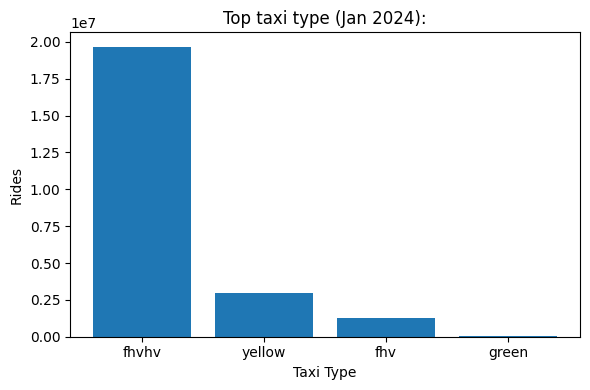


Top taxi type (Jan 2024): 'fhvhv' --- 19,663,930 rides



In [61]:
#Summary
top_t = agg.loc[0, "type"]
top_c = int(agg.loc[0, "rides"])

#ตาราง
table = agg.rename(columns={"type": "Taxi Type", "rides": "Rides"})
display(table)

#กราฟแท่ง
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(agg["type"], agg["rides"])
plt.title("Top taxi type (Jan 2024):")
plt.xlabel("Taxi Type")
plt.ylabel("Rides")
plt.tight_layout()
plt.show()

print(f"\nTop taxi type (Jan 2024): '{top_t}' --- {top_c:,} rides\n")